In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from psifr import fr
from cfr import framework
from cfr import task

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_eeg_mixed.csv')

In [2]:
data = task.read_free_recall(data_file, block=True, block_category=False)

In [3]:
data

,subject,list,item,input,output,study,recall,repeat,intrusion,session,list_type,list_category,item_index,category,block,n_block,block_pos,block_len
0,1,2,SEAN PENN,1.0,5.0,True,True,0,False,1,mixed,mixed,228.0,cel,1.0,6.0,1.0,2.0
1,1,2,AUDREY HEPBURN,2.0,NaN,True,False,0,False,1,mixed,mixed,19.0,cel,1.0,6.0,2.0,2.0
2,1,2,ST PATRICKS CATHEDRAL,3.0,11.0,True,True,0,False,1,mixed,mixed,463.0,loc,2.0,6.0,1.0,4.0
3,1,2,LES INVALIDES,4.0,NaN,True,False,0,False,1,mixed,mixed,364.0,loc,2.0,6.0,2.0,4.0
4,1,2,GREAT ZIMBABWE RUINS,5.0,NaN,True,False,0,False,1,mixed,mixed,340.0,loc,2.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21322,46,48,WILL SMITH,20.0,3.0,True,True,0,False,3,mixed,mixed,253.0,cel,5.0,6.0,3.0,3.0
21323,46,48,SPORK,21.0,NaN,True,False,0,False,3,mixed,mixed,717.0,obj,6.0,6.0,1.0,4.0
21324,46,48,INHALER,22.0,NaN,True,False,0,False,3,mixed,mixed,615.0,obj,6.0,6.0,2.0,4.0
21325,46,48,STAMP,23.0,2.0,True,True,0,False,3,mixed,mixed,719.0,obj,6.0,6.0,3.0,4.0


In [30]:
crp_n_block = data.groupby('n_block').apply(
    fr.lag_crp, lag_key='block', count_unique=True,
    test_key='category', test=lambda x, y: x == y,
)

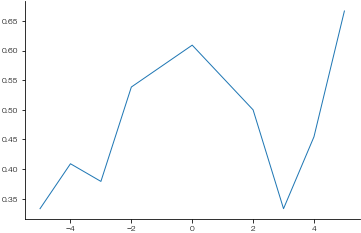

In [48]:
plt.plot((crp_n_block.dropna().loc[(6, 1), 'prob']))

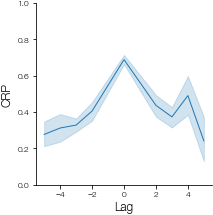

In [77]:
importlib.reload(fr)
fr.plot_lag_crp(crp_n_block.loc[6], split=False);

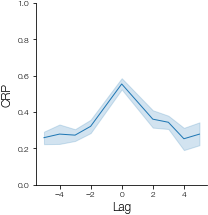

In [78]:
fr.plot_lag_crp(crp_n_block.loc[9], split=False);

In [84]:
combined.loc['within'].query('-5 <= lag <= -1')

prob  actual  possible
subject lag                             
1       -5.0  0.214286       3        14
        -4.0  0.361111      13        36
        -3.0  0.310345      18        58
        -2.0  0.484848      16        33
        -1.0       NaN       0         0
...                ...     ...       ...
46      -5.0  0.153846       4        26
        -4.0  0.222222       6        27
        -3.0  0.212121      14        66
        -2.0  0.428571      18        42
        -1.0       NaN       0         0

[145 rows x 3 columns]

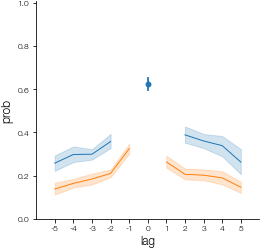

In [101]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.lineplot(data=combined.loc['within'].query('-5 <= lag <= -1').reset_index(), x='lag', y='prob', color='C0')
sns.lineplot(data=combined.loc['across'].query('-5 <= lag <= -1').reset_index(), x='lag', y='prob', color='C1')
sns.pointplot(data=combined.loc['within'].query('lag == 0').reset_index(), x='lag', y='prob', color='C0')
sns.lineplot(data=combined.loc['within'].query('1 <= lag <= 5').reset_index(), x='lag', y='prob', color='C0')
sns.lineplot(data=combined.loc['across'].query('1 <= lag <= 5').reset_index(), x='lag', y='prob', color='C1')
ax.set(xlim=(-6, 6), xticks=np.arange(-5, 6), xticklabels=np.arange(-5, 6), ylim=(0, 1.01));

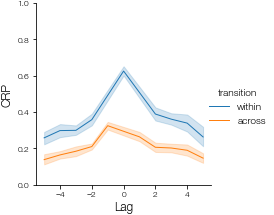

In [19]:
import importlib
importlib.reload(fr)
within = fr.lag_crp(
    data, lag_key='block', count_unique=True, 
    test_key='category', test=lambda x, y: x == y
)
across = fr.lag_crp(
    data, lag_key='block', count_unique=True, 
    test_key='category', test=lambda x, y: x != y
)

combined = pd.concat([within, across], keys=['within', 'across'], axis=0)
combined.index.set_names('transition', level=0, inplace=True)
fr.plot_lag_crp(combined, split=False, hue='transition').add_legend();

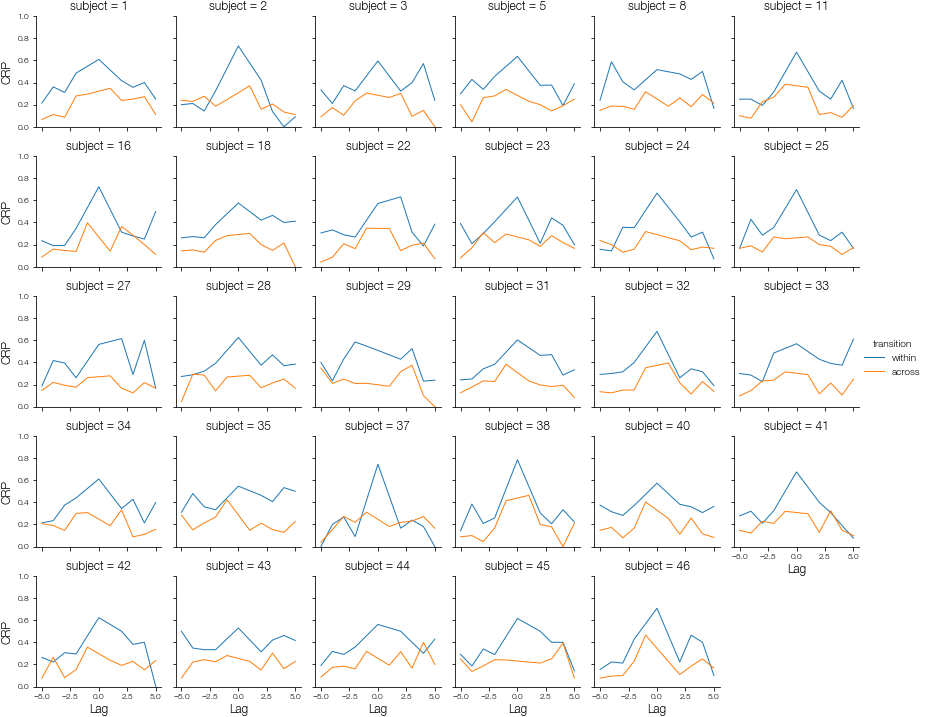

In [106]:
importlib.reload(fr)
fr.plot_lag_crp(combined, split=False, hue='transition', col='subject', col_wrap=6, height=2).add_legend();

In [23]:
fr.category_crp(data, 'category').sort_values('prob')

,prob,actual,possible
subject,,,
42,0.526531,129,245
38,0.558405,196,351
44,0.564460,162,287
2,0.569733,192,337
27,0.570093,122,214
37,0.576471,98,170
34,0.579151,150,259
41,0.585714,205,350
33,0.603960,183,303
